In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from src.environments.awake_e_steering import AwakeESteering

In [3]:
env = AwakeESteering(backend="cheetah")
env

In [4]:
env.observation_space

Box(-inf, inf, (10,), float32)

In [5]:
env.action_space

Box(-0.0003, 0.0003, (10,), float32)

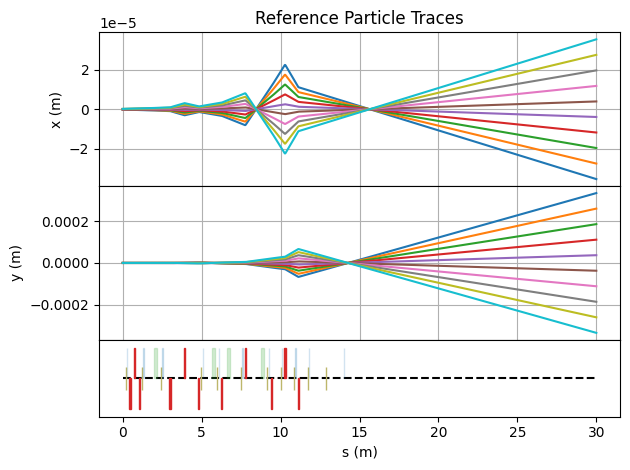

In [6]:
env.backend.segment.plot_overview()

In [7]:
env.reset()

(array([-0.00012565, -0.00016754, -0.0003107 , -0.00056277, -0.00136898,
         0.00161094,  0.00359843,  0.00281137,  0.00182294,  0.00128865],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([ 9.0386552e+07, -1.0948645e-04, -1.0773678e-05, -8.0255081e-04,
          -5.2781656e-05,  1.4455775e-04,  2.6191447e-05,  4.1096489e-04,
           4.8263999e-05,  3.5556899e-05,  9.8557642e-04], dtype=float32)}})

In [8]:
env.step(env.action_space.sample())

(array([ 6.6689208e-05,  7.2059243e-05, -7.1860231e-05, -4.1529679e-04,
        -8.9510484e-04,  8.7320758e-04,  2.2799969e-03,  2.0713755e-03,
         1.9600424e-03,  2.4233111e-03], dtype=float32),
 -0.14475552598014474,
 True,
 False,
 {'backend_info': {'incoming_beam': array([ 9.0386552e+07, -1.0948645e-04, -1.0773678e-05, -8.0255081e-04,
          -5.2781656e-05,  1.4455775e-04,  2.6191447e-05,  4.1096489e-04,
           4.8263999e-05,  3.5556899e-05,  9.8557642e-04], dtype=float32)}})

In [9]:
wrapped_env = RescaleAction(env, -1, 1)

check_env(wrapped_env)

In [13]:
env.backend.segment.length

tensor(30.)

In [14]:
len(env.backend.segment.elements)

103

In [15]:
sum(isinstance(element, cheetah.Quadrupole) for element in env.backend.segment.elements)

11

In [17]:
[
    element.name
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]

['MQAWD_430031',
 'MQAWF_430034',
 'MQAWD_430037',
 'MQAWD_430109',
 'MQAWF_430118',
 'MQAWD_430128',
 'MQAWF_430205',
 'MQAWF_430311',
 'MQAWD_412344',
 'MQAWF_412346',
 'MQAWD_412347']